# Introduction et problématisation

# Aperçu de la base de données et nettoyage
  ## Installation de tous les packages nécessaires au projet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from urllib import request
import csv
import bs4
from tqdm.notebook import trange
import seaborn as sns
import numpy as np

In [3]:
!git clone -l -s git://https://github.com/marie-ganon/Projet-Python-S1.git
%cd cloned-repo
!ls

Cloning into 'Projet-Python-S1'...
fatal: unable to look up https (port 9418) (nodename nor servname provided, or not known)
[Errno 2] No such file or directory: 'cloned-repo'
/Users/h2jw/Dropbox/GitHub/Projet-Python-S1
Notebook Projet GANON-HE.ipynb base_clean_keywords.zip
README.md                      movies_metadata.csv.zip
base_clean.csv                 temp_dir


## Aperçu de la base initiale

La base que nous avons décidé de choisir pour mener à bien notre projet est issue du site The Movie Database, BLABLABLA

Le dataset est disponible à l'adresse suivante : https://www.kaggle.com/rounakbanik/the-movies-dataset. Une partie de la base a été prénettoyée sur Excel et avec des méthodes Python simples. 

In [4]:
ls Dropbox/GitHub/Projet-Python-S1

ls: Dropbox/GitHub/Projet-Python-S1: No such file or directory


In [5]:
cd Dropbox/GitHub/Projet-Python-S1

[Errno 2] No such file or directory: 'Dropbox/GitHub/Projet-Python-S1'
/Users/h2jw/Dropbox/GitHub/Projet-Python-S1


In [6]:
# On crée un dossier temporaire pour dézipper le csv
import tempfile

temp_dir = tempfile.mkdtemp()


In [93]:
# Pour dezipper le csv disponible dans le git (movies metadata)

import zipfile

with zipfile.ZipFile('movies_metadata.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('temp_dir')
    

In [237]:
df = pd.read_csv(r'temp_dir/movies_metadata.csv', sep=',', low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

On regarde tout d'abord si la base comporte beaucoup de cellules vide:

Complétude totale en pourcentage de la base : 90.32592120119062 %


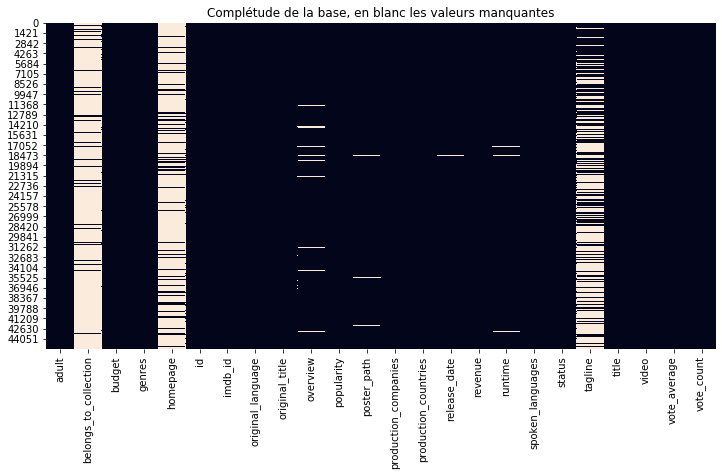

In [238]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Complétude de la base, en blanc les valeurs manquantes')
print("Complétude totale en pourcentage de la base :", (1-df.isnull().sum().sum()/(len(df.id)*len(df.columns)))*100,'%')

## Détails des colonnes de la base

# Nettoyage de la base

## Nettoyage de *production_companies* 

In [239]:
df.production_companies

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
45464                 [{'name': 'Yermoliev', 'id': 88753}]
45465                                                   []
Name: production_companies, Length: 45466, dtype: object

In [240]:
df_temp = df.production_companies.str.split(',')
df_1 = pd.DataFrame()
df_2 = pd.DataFrame()
df_1['name'] = df_temp.str.get(0)
df_1['id'] = df_temp.str.get(1)
df['production_companies_name'] = df_1.name.str.split(':').str.get(1)
df_2['production_companies_id'] = df_1.id.str.split(':').str.get(1)


In [241]:
import re
l = []
for elem in df_2['production_companies_id']:
  string1 = str(elem)
  l.append(map(int, re.findall(r'\d+', string1)))
df['production_companies_id']= pd.DataFrame(l)


In [242]:
df.production_companies_name

0                        'Pixar Animation Studios'
1                               'TriStar Pictures'
2                                   'Warner Bros.'
3         'Twentieth Century Fox Film Corporation'
4                          'Sandollar Productions'
                           ...                    
45461                                          NaN
45462                                'Sine Olivia'
45463                    'American World Pictures'
45464                                  'Yermoliev'
45465                                          NaN
Name: production_companies_name, Length: 45466, dtype: object

In [244]:
df.production_companies_name = df.production_companies_name.str.replace(r'[^\w\s]+', '')
#df.production_companies_id= df.production_companies_id.str.replace(r'[^\w\s]+', '')

0            3.0
1          559.0
2         6194.0
3          306.0
4         5842.0
          ...   
45461        NaN
45462    19653.0
45463     6165.0
45464    88753.0
45465        NaN
Name: production_companies_id, Length: 45466, dtype: float64

Text(0.5, 1.0, 'Occurrences des 500 premières entreprises de production')

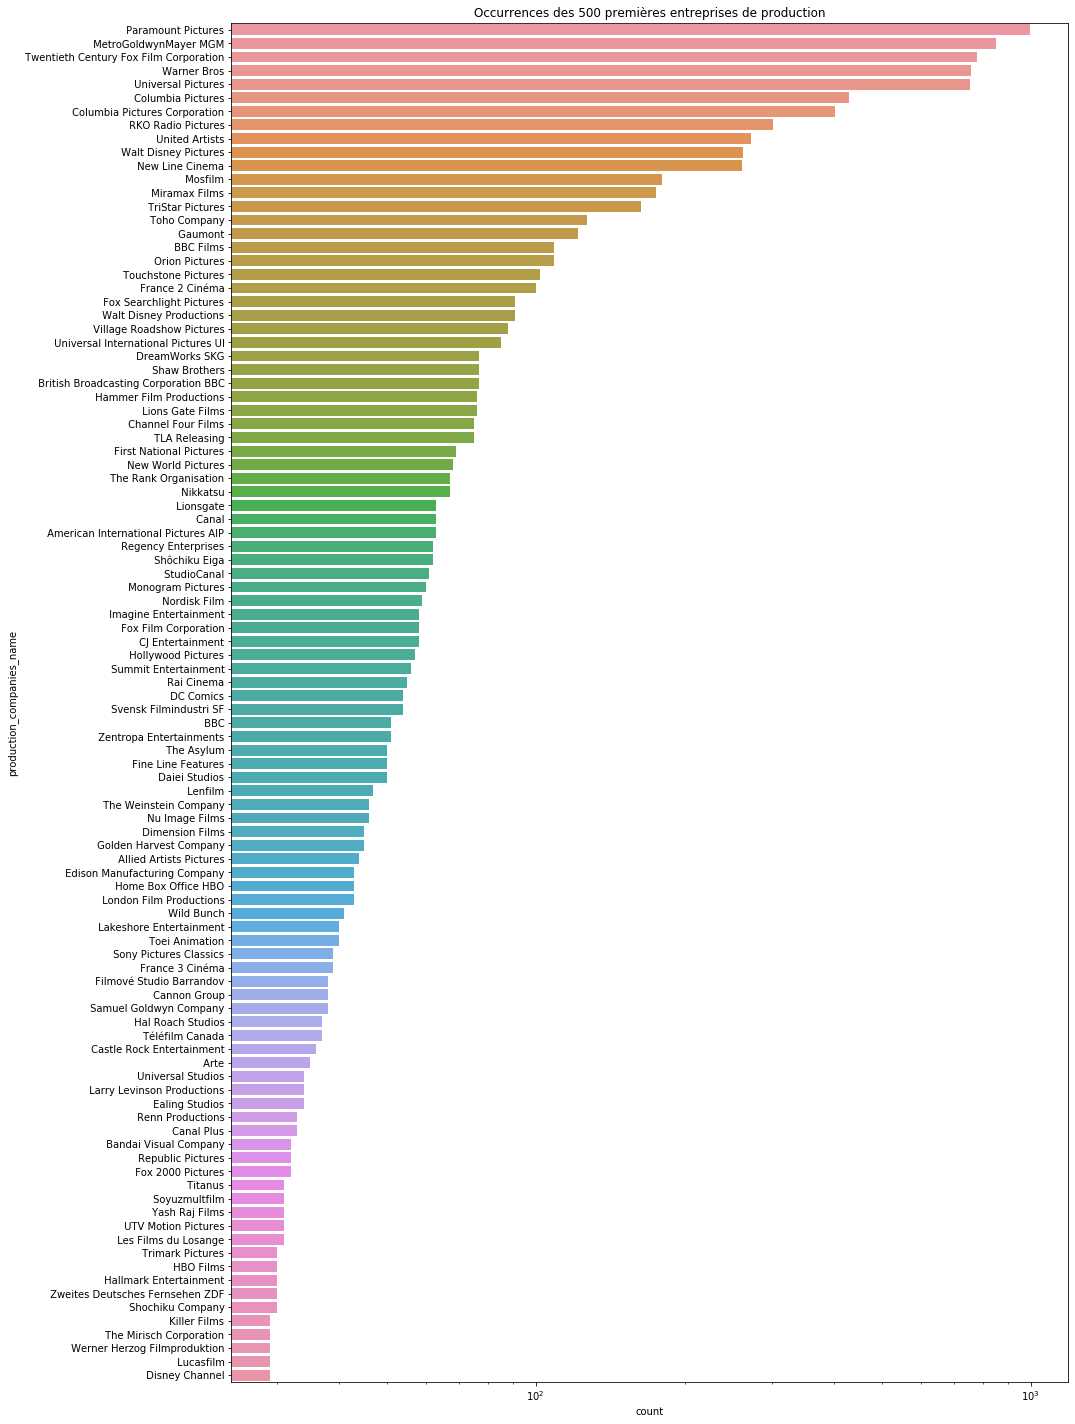

In [235]:

fig, ax = plt.subplots(figsize=(15,25))
sns.countplot(y = df.production_companies_name, data = df, order =df.production_companies_name.value_counts().iloc[:100].index)
ax.set_xscale('log')
plt.title('Occurrences des 500 premières entreprises de production')


On peut remarquer quelques effets à corriger : certains films sont mal regroupés en raison de l'utilisation des acronymes ou du nom complet de la société de production. Par exemple pour Lionsgate présent aussi avec Lions Gate, ou la BBC, British Broadcasting Channel etc. 

Une façon de contourner ce problème est de lier les noms aux id. 

In [253]:
df.production_companies_id.describe()

count    33402.000000
mean     10582.189540
std      18087.974359
min          1.000000
25%        512.000000
50%       3929.500000
75%      10285.000000
max      96067.000000
Name: production_companies_id, dtype: float64

[3.0,
 559.0,
 6194.0,
 306.0,
 5842.0,
 508.0,
 4.0,
 2.0,
 33.0,
 60.0,
 5.0,
 5.0,
 33.0,
 915.0,
 183.0,
 33.0,
 441.0,
 14.0,
 5682.0,
 5.0,
 216.0,
 508.0,
 1885.0,
 175.0,
 60.0,
 5.0,
 12.0,
 288.0,
 311.0,
 2588.0,
 915.0,
 33.0,
 70801.0,
 33.0,
 694.0,
 406.0,
 53390.0,
 6130.0,
 4.0,
 53009.0,
 871.0,
 175.0,
 14.0,
 12.0,
 364.0,
 33.0,
 12.0,
 2.0,
 2480.0,
 361.0,
 nan,
 14.0,
 nan,
 2.0,
 14.0,
 7320.0,
 4.0,
 nan,
 nan,
 4.0,
 4.0,
 915.0,
 14.0,
 6194.0,
 8411.0,
 12.0,
 14.0,
 82.0,
 12.0,
 59.0,
 1885.0,
 5841.0,
 1742.0,
 12.0,
 6194.0,
 3388.0,
 4606.0,
 14.0,
 441.0,
 38953.0,
 14.0,
 575.0,
 38196.0,
 nan,
 2492.0,
 915.0,
 306.0,
 4.0,
 4.0,
 14.0,
 559.0,
 4.0,
 14.0,
 306.0,
 97.0,
 802.0,
 181.0,
 3324.0,
 5.0,
 18.0,
 9195.0,
 8411.0,
 33.0,
 56.0,
 nan,
 2.0,
 nan,
 nan,
 4564.0,
 441.0,
 12.0,
 175.0,
 806.0,
 83.0,
 nan,
 3236.0,
 559.0,
 11308.0,
 559.0,
 nan,
 4.0,
 540.0,
 371.0,
 14.0,
 264.0,
 22029.0,
 nan,
 nan,
 nan,
 8.0,
 4.0,
 93488.0,
 nan,
 

Text(0.5, 1.0, 'Occurrences des 500 premières entreprises de production')

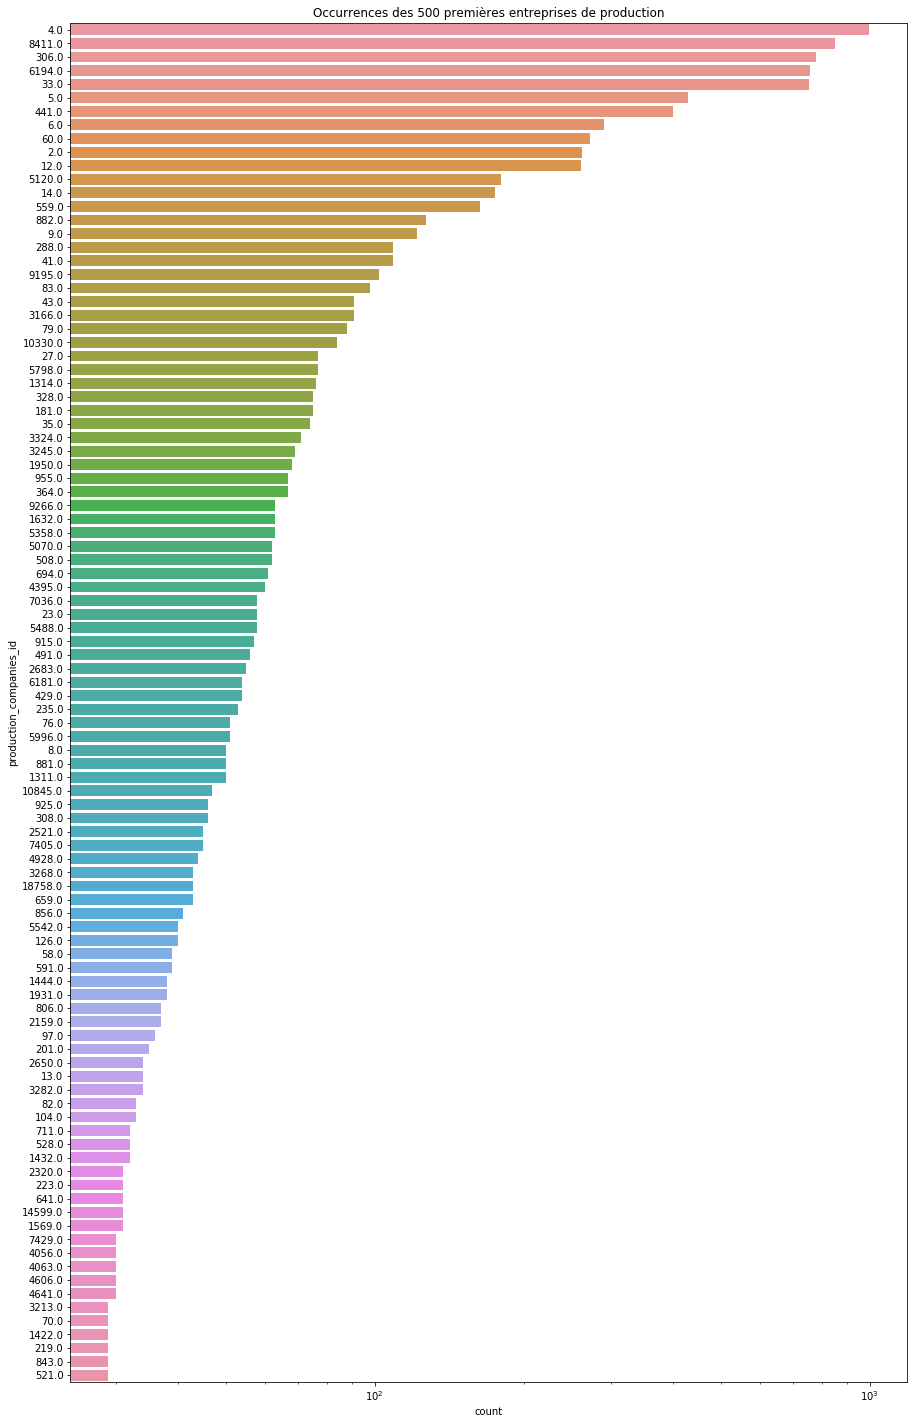

In [245]:
fig, ax = plt.subplots(figsize=(15,25))
sns.countplot(y = df.production_companies_id, data = df, order =df.production_companies_id.value_counts().iloc[:100].index)
ax.set_xscale('log')
plt.title('Occurrences des 500 premières entreprises de production')

## Nettoyage de *production_countries*

In [219]:
df.production_countries.str.split(',').str.get(1)

0         'name': 'United States of America'}]
1         'name': 'United States of America'}]
2         'name': 'United States of America'}]
3         'name': 'United States of America'}]
4         'name': 'United States of America'}]
                         ...                  
45461                         'name': 'Iran'}]
45462                  'name': 'Philippines'}]
45463     'name': 'United States of America'}]
45464                       'name': 'Russia'}]
45465               'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [220]:

df_temp = df.production_countries.str.split(',')
df_1 = pd.DataFrame()
df_2 = pd.DataFrame()
df_1['country_code'] = df_temp.str.get(0)
df_1['country_name'] = df_temp.str.get(1)
df['country_code'] = df_1.country_code.str.split(':').str.get(1)
df_2['country_name_try'] = df_1.country_name.str.split(':').str.get(1)
df['country_name']=df_2['country_name_try'].str.split('}').str.get(0)

df.country_code = df.country_code.str.replace(r'[^\w\s]+', '')
df.country_name = df.country_name.str.replace(r'[^\w\s]+', '')

On supprime alors les colonnes dédoublées lors du nettoyage. 

In [221]:
df = df.drop(columns=['production_companies','production_countries'])

Text(0.5, 1.0, 'Occurrences totales des pays de production')

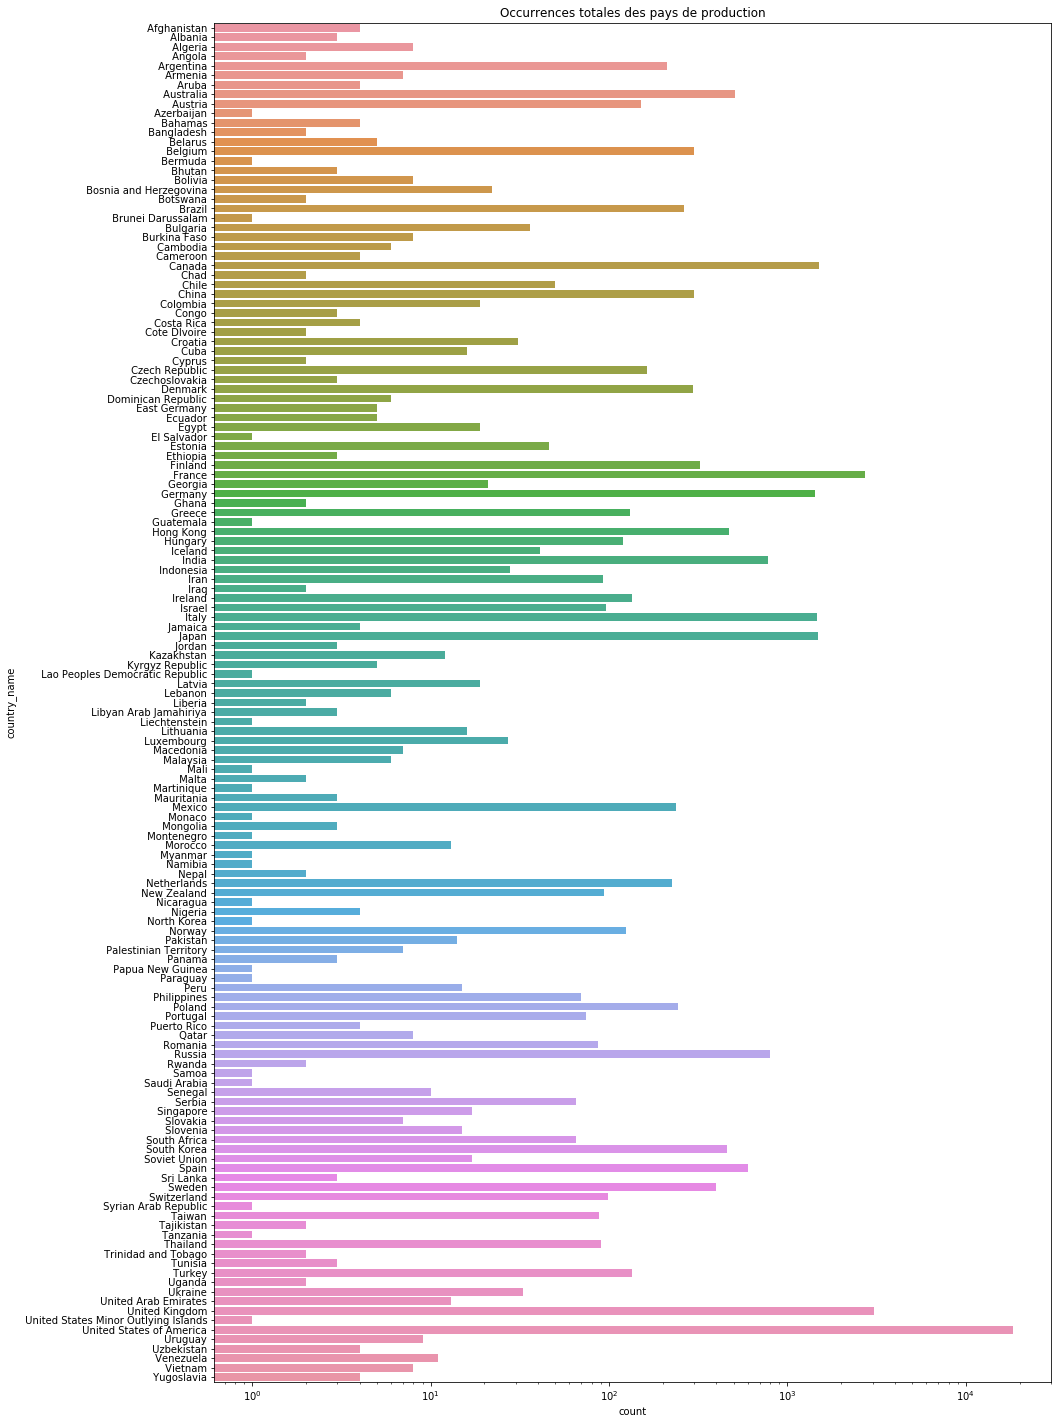

In [222]:

fig, ax = plt.subplots(figsize=(15,25))
sns.countplot(y = df.country_name.sort_values())
ax.set_xscale('log')
plt.title('Occurrences totales des pays de production')


La variable 'country_name' est suffisamment propre. Complétude ?

Country_name est complet à  86.16988518893238 %


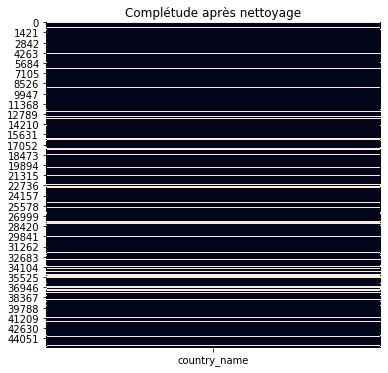

In [223]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df[['country_name']].isnull(),cbar=False)
plt.title('Complétude après nettoyage')
print('Country_name est complet à ',(1-len(df.country_name[df.country_name.isnull()])/len(df.country_name))*100,'%')

On commence par retirer toute la ponctuation, qui ne nous servira pas.  

In [110]:

df.genres = df.genres.str.replace(r'[^\w\s]+', '')
df.production_countries = df.production_countries.str.replace(r'[^\w\s]+', '')
df.spoken_languages = df.spoken_languages.str.replace(r'[^\w\s]+', '')


Nous obtenons alors ce résultat-ci :

In [17]:
df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,production_companies_name,production_companies_id,country_code,country_name
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,id 16 name Animation id 35 name Comedy id 1075...,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,Pixar Animation Studios,3.0,US,United States of America
1,False,NaN,65000000,id 12 name Adventure id 14 name Fantasy id 107...,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,TriStar Pictures,559.0,US,United States of America
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,id 10749 name Romance id 35 name Comedy,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Warner Bros,6194.0,US,United States of America
3,False,NaN,16000000,id 35 name Comedy id 18 name Drama id 10749 na...,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,Twentieth Century Fox Film Corporation,306.0,US,United States of America
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,id 35 name Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Sandollar Productions,5842.0,US,United States of America


Nous remarquons que conserver certains mots dans les cellules de la base, tels que les 'id', 'name', ne sont pas pertinents. Par ailleurs, il sera plus lisible de pouvoir associer les identifiants de langue ISO_639-1 à leur langue dans les colonnes 'original_language' et 'spoken_language'. Ces deux objectifs sont l'objet des sections suivantes.



## Scraping de la liste ISO_639-1

Cette liste est disponible sur l'url suivante : https://fr.wikipedia.org/wiki/Liste_des_codes_ISO_639-1.

Nous allons récupérer les identifiants, ainsi que les langues correspondantes:

In [19]:
url_iso = "https://fr.wikipedia.org/wiki/Liste_des_codes_ISO_639-1"
    
request_text = request.urlopen(url_iso).read()
page = bs4.BeautifulSoup(request_text, "lxml")

Les informations que nous désirons étant contenues dans un tableau, on le récupère puis on le convertit en Data Frame

In [149]:
table = page.find('table')
ls = str(table)
liste_iso = pd.DataFrame(pd.read_html(ls)[0])
liste_iso

,639-1,639-2,639-3,Nom de la langue,Nom(dans la langue correspondante),Nom en anglais,Commentaire
0,aa,aar,aar,Afar,Afaraf,Afar,NaN
1,ab,abk,abk,Abkhaze,Аҧсуа,Abkhazian,NaN
2,ae,ave,ave,Avestique,Avesta,Avestan,NaN
3,af,afr,afr,Afrikaans,Afrikaans,Afrikaans,NaN
4,ak,aka,aka + 2,Akan,Akan,Akan,NaN
...,...,...,...,...,...,...,...
182,yi,yid,yid + 2,Yiddish,ייִדיש,Yiddish,NaN
183,yo,yor,yor,Yoruba,Yorùbá,Yoruba,NaN
184,za,zha,zha + 2,Zhuang,Saɯ cueŋƅ ; Saw cuengh,Zhuang,NaN
185,zh,chi/zho,zho + 13,Chinois,"中文, 汉语, 漢語",Chinese,NaN


Après une étude approfondie de la base, nous avons constaté que certains films possédaient l'identifiant 'cn' correspondant au cantonais. On le rajoute au Data Frame précédent: 

In [150]:
liste_iso.loc[187] = ['cn', 'NaN', 'NaN', 'Cantonais', 'NaN', 'Cantonese', 'NaN']
liste_iso

,639-1,639-2,639-3,Nom de la langue,Nom(dans la langue correspondante),Nom en anglais,Commentaire
0,aa,aar,aar,Afar,Afaraf,Afar,NaN
1,ab,abk,abk,Abkhaze,Аҧсуа,Abkhazian,NaN
2,ae,ave,ave,Avestique,Avesta,Avestan,NaN
3,af,afr,afr,Afrikaans,Afrikaans,Afrikaans,NaN
4,ak,aka,aka + 2,Akan,Akan,Akan,NaN
...,...,...,...,...,...,...,...
183,yo,yor,yor,Yoruba,Yorùbá,Yoruba,NaN
184,za,zha,zha + 2,Zhuang,Saɯ cueŋƅ ; Saw cuengh,Zhuang,NaN
185,zh,chi/zho,zho + 13,Chinois,"中文, 汉语, 漢語",Chinese,NaN
186,zu,zul,zul,Zoulou,isiZulu,Zulu,NaN


La fonction suivante permettra de récupérer la langue associée à un identifiant ISO_639-1. En la faisant tourner, nous nous sommes rendu compte que les NaN n'étaient pas toujours indiqués de la même manière. Il faut donc prendre en compte ces cas pour éviter toute erreur lors du lancement de la fonction.

In [151]:
def find_id(id):
  if id == '' or id == 'NaN' or id == 'xx' or id == 'nan' or id =='104.0' or id =='68.0' or id =='82.0':        # on élimine le cas où la langue n'est pas indiquée
    return ''
  i = 0
  while (str((liste_iso['639-1'])[i]) == id) == False and i<len(df):
    i += 1
  return liste_iso['Nom de la langue'][i]

## Nettoyage de la variable 'original_language'

On teste la fonction sur la première entrée de la colonne 'original_language'

In [152]:
test = str('en')
find_id(test)

'Anglais'

Puis on généralise la méthode à toutes les cellules de cette colonne :

In [66]:
for i in trange(len(df)):
  id = str(df.original_language[i])
  df.original_language[i] = find_id(id)

/Users/h2jw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
df.original_language

0        en
1        en
2        en
3        en
4        en
         ..
45461    fa
45462    tl
45463    en
45464    en
45465    en
Name: original_language, Length: 45466, dtype: object

## Nettoyage de *genre* 

Le but de cette partie est de supprimer les informations non-essentielles qui se trouvent dans les cellules de ces colonnes.

On s'intéresse dans un premier temps à la colonne 'genres'.

In [96]:
df.genres[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

Dans cet exemple, il nous faut seulement les mots 'Animation', 'Comedy' et 'Family'. Grâce à la fonction split(), nous pouvons transformer cette chaîne de caractère en liste, puis récupérer les mots qui nous intéressent. Le code suivant réalise cette opération pour toutes les cellules de cette colonne


In [97]:
for i in trange(len(df)):
  genre = df.genres[i].split()
  df.genres[i] = ""
  for j in range(len(genre)//4):
    if j == 0 :
      df.genres[i] = df.genres[i] + genre[3]
    else : 
      df.genres[i] = df.genres[i] + ', ' + genre[3 + j*4]

/Users/h2jw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/h2jw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/h2jw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [111]:
df.genres

0         Animation Comedy Family
1        Adventure Fantasy Family
2                  Romance Comedy
3            Comedy Drama Romance
4                          Comedy
                   ...           
45461                Drama Family
45462                       Drama
45463       Action Drama Thriller
45464                            
45465                            
Name: genres, Length: 45466, dtype: object

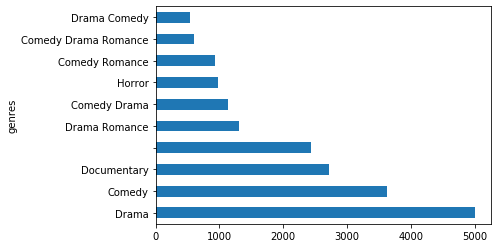

In [112]:
df.groupby(df['genres']).id.count().sort_values(ascending = False)[:10].plot(kind = 'barh')

Les films de genre *drame*, *comédie* et *documentaire* sont les plus représentés dans l'ensemble des films. Remarquons qu'on n'a pas récupéré les genres indépendamments ici : on considère comme un genre à part entière des subsets composés de plusieurs genres. On pourrait vouloir voir la proportion des films contenant "Drama" ou "Romance" par exemple.

In [113]:
l = []
for i in trange(len(df)):
    genre = df.genres[i].split()
    for i in genre :
        l.append(i)
genre = pd.DataFrame(l, columns=['genre'])
genre = genre.genre.str.replace(r',', '')
genre

0        Animation
1           Comedy
2           Family
3        Adventure
4          Fantasy
           ...    
91104       Family
91105        Drama
91106       Action
91107        Drama
91108     Thriller
Name: genre, Length: 91109, dtype: object

Text(0.5, 1.0, 'Occurrences totales des genres')

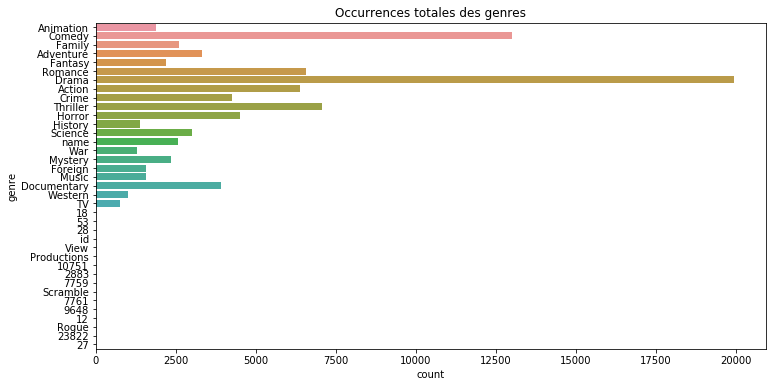

In [114]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(y = genre)
plt.title('Occurrences totales des genres')


Ces premières statistiques descriptives nous font apparaître que la base n'est pas bien nettoyée puiqu'il reste des id et des entrées qui ne correspondent pas au genre. 

In [115]:
df.genres[df.genres.notnull()].sort_values()


45465                                   
21814                                   
21818                                   
21836                                   
21853                                   
                      ...               
22157                   Western Thriller
36003                        Western War
7989         Western War History Romance
35587    id Productions Rogue name 23822
19730           id View name Productions
Name: genres, Length: 45466, dtype: object

In [170]:
df.at[35587,'genres'] = ''
df.at[19730, 'genres'] = ''
df.genres = df.genres.str.replace('name','')
df.genres = df.genres.str.replace('Productions', '')
df.genres = df.genres.str.replace('18','')
df.genres = df.genres.str.replace('53','')
df.genres = df.genres.str.replace('28','')
df.genres = df.genres.str.replace('id','')
df.genres = df.genres.str.replace('View','')
df.genres = df.genres.str.replace('10751','')
df.genres = df.genres.str.replace('2883','')
df.genres = df.genres.str.replace('7759','')
df.genres = df.genres.str.replace('7761','')
df.genres = df.genres.str.replace('9648','')
df.genres = df.genres.str.replace('12','')
df.genres = df.genres.str.replace('23822','')
df.genres = df.genres.str.replace('27','')
df.genres = df.genres.str.replace('83','')
df.genres = df.genres.str.replace('Scramble','')



Une fois nettoyée : 


88508


Text(0.5, 1.0, 'Occurrences totales des genres')

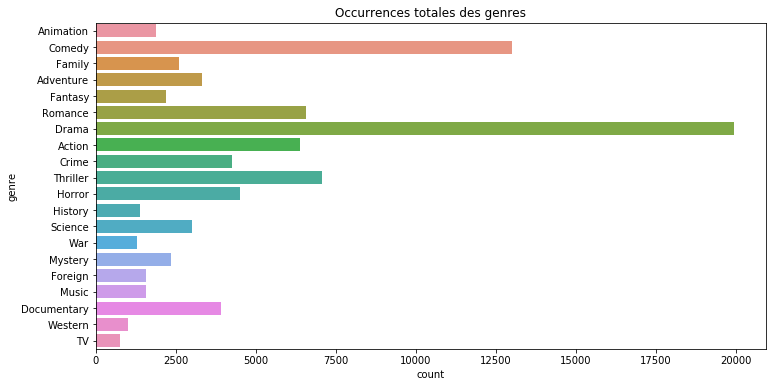

In [171]:
l = []
for i in trange(len(df)):
    genre = df.genres[i].split()
    for i in genre :
        l.append(i)
print(len(l))
df_genre = pd.DataFrame(l, columns=['genre'])
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(y = df_genre.genre)
plt.title('Occurrences totales des genres')


Complétude après nettoyage ? 

In [193]:
len(df.genres[df.genres == ''])
df.genres = df.genres.replace('', np.NaN)

Genres est complet à  94.62455461223772 %


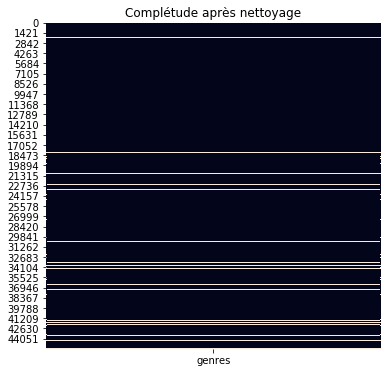

In [197]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df[['genres']].isnull(),cbar=False)
plt.title('Complétude après nettoyage')
print('Genres est complet à ',(1-len(df.genres[df.genres.isnull()])/len(df.genres))*100,'%')

## Nettoyage de la variable 'budget'

In [201]:
df.budget.sort_values()

19730    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
29503    /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
35587    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
45465                                   0
26992                                   0
                       ...               
39688                             9900000
34215                            99000000
11609                              994000
39203                              996519
9247                               998000
Name: budget, Length: 45466, dtype: object

In [205]:
df.budget.loc[[19730,29503,35587]] = np.NaN

In [209]:
df.budget = df.budget.astype(float)

## Variable *spoken_language*

Intéressons-nous désormais à la colonne spoken_language :

In [86]:
base_init.spoken_languages

0                 [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                 [{'iso_639_1': 'en', 'name': 'English'}]
3                 [{'iso_639_1': 'en', 'name': 'English'}]
4                 [{'iso_639_1': 'en', 'name': 'English'}]
                               ...                        
45461               [{'iso_639_1': 'fa', 'name': 'فارسی'}]
45462                    [{'iso_639_1': 'tl', 'name': ''}]
45463             [{'iso_639_1': 'en', 'name': 'English'}]
45464                                                   []
45465             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 45466, dtype: object

Nous remarquons que les cellules de cette colonne ont la même structure que celles de la colonne 'genre'. Ici, nous souhaitons garder les identifiants iso_639_1 ('en' pour la première ligne). Nous pourrons ensuite les associer à une langue grâce à la base liste_iso.

Cependant, pour certaines cellules, les caractères qui suivent 'name' et qui indiquent le nom de la langue occupent plus qu'un mot. Nous allons donc les traiter à part.

Puis on nettoie la colonne 'spoken language' et on associe l'identifiant iso_639_1 à sa langue.

In [87]:
for i in range(len(df)):
  langue = df.spoken_languages[i].split()
  df.spoken_languages[i] = ""
  others = []
  if len(langue)%4 == 0 :   # on vérifie si la cellule possède 4 caractères par langue
    for j in range(len(langue)//4):
      print(i)
      if j == 0 :
        df.spoken_languages[i] = df.spoken_languages[i] + find_id(str(langue[1]))
      else : 
        df.spoken_languages[i] = df.spoken_languages[i] + ', ' + find_id(str(langue[1 + j*4]))
  else :
    others.append(i)
return others

2


/Users/h2jw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: 188

In [88]:
df.spoken_languages

0                                                
1                                                
2                                                
3        [{'iso_639_1': 'en', 'name': 'English'}]
4        [{'iso_639_1': 'en', 'name': 'English'}]
                           ...                   
45461      [{'iso_639_1': 'fa', 'name': 'فارسی'}]
45462           [{'iso_639_1': 'tl', 'name': ''}]
45463    [{'iso_639_1': 'en', 'name': 'English'}]
45464                                          []
45465    [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 45466, dtype: object

In [ ]:
others

# Scraping de mots-clés caractérisant le film

Le but de cette partie est de récupérer des mots-clés pour chaque film de la base. Pour un film donné, d'identifiant imbd_id, nous allons scraper la page https://www.imdb.com/title/imbd_id/keywords. Tout l'intérêt de la démarche est de pouvoir réaliser des nuages de mots, pour tenter de mettre en évidence les thématiques qui plaisent au public.

In [84]:
url_keywords = "https://www.imdb.com/title/" + df.imdb_id[1] +"/keywords"
    
request_text = request.urlopen(url_keywords).read()
page = bs4.BeautifulSoup(request_text, "lxml")

On peut ensuite récupérer facilement les mots-clés, repérés dans le code source par 'data-item-keyword' :

In [85]:
for post in page.findAll('td'):
    print(post.get('data-item-keyword'))

board game
adventurer
fight
game
year 1995
drumbeat
jumanji
franchise
first of series
first part
cult film
cult classic
christmas
1960s
1990s
20th century
jungle
magic
trapped in a game
dybbuk box
based on children's book
rainforest
surrealism
year 1969
new hampshire
blockbuster
wood
board
explorer
footwear
bug
danger
adulthood
child
childhood
perilous escape
pigtails
bearded man
shared universe
old photograph
child turning into animal
live action and animation
psychotronic film
supernatural power
1860s
19th century
friends who live together
overalls
actor playing multiple roles
animal killing
heavy rain
rampage
hiding in a closet
mutation
attic
friendship
fish out of water
stealing a car
hunter
year 1869
abandoned factory
tail
sporting goods store
small town
motorcycle
giant insect
forest
factory
exterminator
crocodile
big game hunter
one word title
no opening credits
rhinoceros
pelican
mosquito
monkey
lion
earthquake
zebra
elephant
bully
title spoken by character
woodland
lush
vegeta

On généralise la démarche à tous les films de la base, puis on stocke les mots-clés dans une nouvelle variable. Cependant, il a fallu exclure certains indices car nous avons constaté que pour ceux-ci, le lien https://www.imdb.com/title/imbd_id/keywords n'existait pas.

In [ ]:
df_new_column = pd.DataFrame(0, index=np.arange(len(df)), columns=['keywords'])
df = pd.concat([df,df_new_column], axis=1)

df

In [ ]:
for i in trange(33357,len(df)):
  if df.imdb_id[i] == None or str(df.imdb_id[i]) == 'nan' or str(df.imdb_id[i]) == 'NaN' or str(df.imdb_id[i]) == '0' or i == 30399 or i == 30544 or i==33357:
    pass
  else:
    url_keywords = "https://www.imdb.com/title/" + df.imdb_id[i] +"/keywords"
    request_text = request.urlopen(url_keywords).read()
    page = bs4.BeautifulSoup(request_text, "lxml")
    l = []
    for post in page.findAll('td'):
      l.append(post.get('data-item-keyword'))
    df.keywords[i] = l

In [ ]:
#from google.colab import files
df.to_csv('base_clean.csv') 
#files.download('base_clean.csv')

# Statistiques descriptives

## Genres

## Variables quantitatives

### Budget

Une simple recherche internet nous informe que les budgets les plus petits dans la conception d'un film (appelés films "micro-budget") s'élèvent à quelques milliers de dollars. On peut regarder la distribution des films microbudgets.

In [258]:
len(df.budget[df.budget == 0])/len(df.budget)*100

80.44032903708266

In [217]:
df.budget[df.budget < 10000].describe()

count    36873.000000
mean         8.133784
std        201.490942
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9500.000000
Name: budget, dtype: float64

Pourcentage de microfilms (budget inférieur à 10000 dollars) à budget inférieurs à 1000 dollars :  99.85083936755892 %


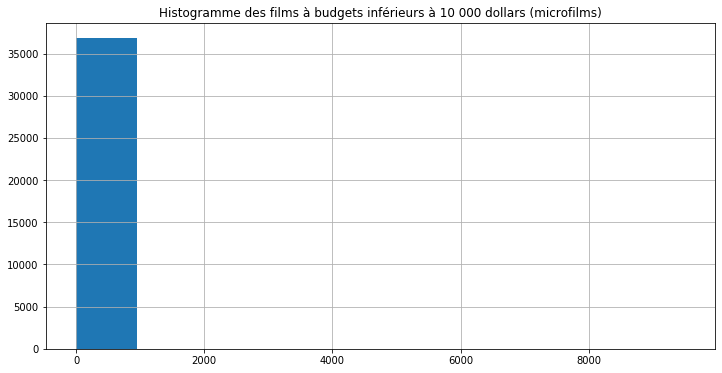

In [238]:
fig, ax = plt.subplots(figsize=(12,6))
df.budget[df.budget < 10000].hist()
plt.title('Histogramme des films à budgets inférieurs à 10 000 dollars (microfilms)')

print('Pourcentage de microfilms (budget inférieur à 10000 dollars) à budget inférieurs à 1000 dollars : ', (len(df.budget[df.budget < 1000])/len(df.budget[df.budget < 10000]))*100,'%')

Au sein des microfilms (budget inférieur à 10000 dollars), on compte 99.85% de films à budget inférieur à 1000 euros. Ce nombre est de fait assez suspect, on peut imaginer que la base contient des 0 pour les valeurs de budget inconnues ainsi que la plupart des nombres entre 0 et 1000 dollars de production sont des outliers dûs à des erreurs de saisies. 

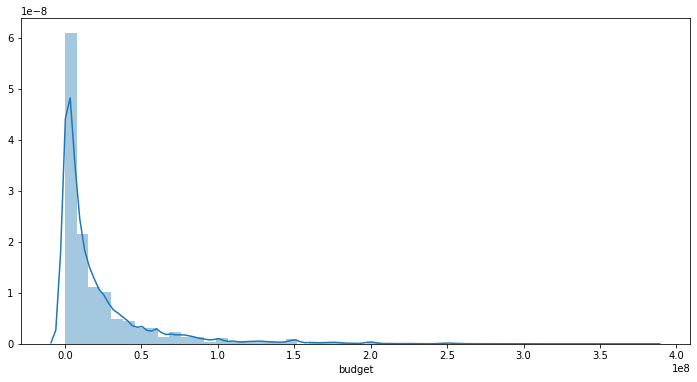

In [247]:
df_budget_ecrete = df.budget[df.budget > 10000]
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.distplot(df_budget_ecrete)
#ax.set_xscale('log')
#ax.set_yscale('log')

((array([-3.77240845, -3.54511026, -3.42022122, ...,  3.42022122,
          3.54511026,  3.77240845]),
  array([1.04e+04, 1.10e+04, 1.10e+04, ..., 2.80e+08, 3.00e+08, 3.80e+08])),
 (27726595.02718325, 22400462.640541162, 0.7991918566608214))

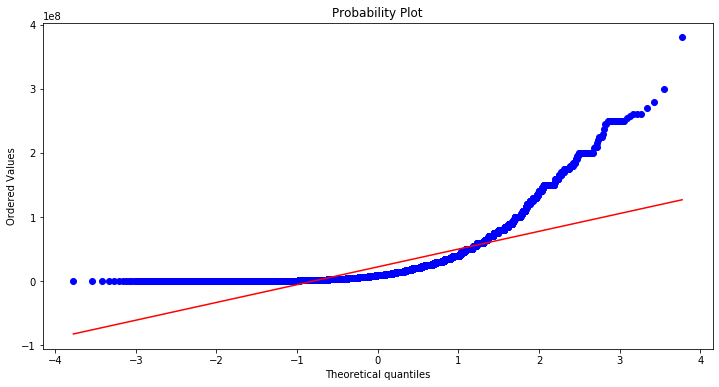

In [255]:
from scipy import stats
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,6))
stats.probplot(df_budget_ecrete, plot=sns.mpl.pyplot)

L'information sur le budget paraît peu exploitable du fait de la dispersion des données...

### Revenue

# Modélisation